In [6]:
import numpy as np
import pickle as pk
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [3]:
import game,players,dominion,derivbot,combobot,cards,basic_ai,rl_agent

In [4]:
modules = [game,players,dominion,derivbot,cards,basic_ai,rl_agent]
for m in modules:
    reload(m)

# run games of random bot vs. smithy bot

In [34]:
st = time.time()
s = []
for i in xrange(1000):
    p1 = combobot.smithyComboBot
    vf = lambda x: 0
    p2 = rl_agent.RLPlayer(vf)
    s_this = dominion.run([p1,p2])
    s.append(s_this)
print time.time() - st

55.1958818436


In [35]:
rl=[]
smithy=[]
for s_this in s:
    if isinstance(s_this[0][0], rl_agent.RLPlayer):
        rl.append(s_this[0][1])
        smithy.append(s_this[1][1])
    else:
        rl.append(s_this[1][1])
        smithy.append(s_this[0][1])

rl = np.array(rl)
smithy = np.array(smithy)

### win rate of random bot is 0 in 1000 games

In [36]:
sum(rl-smithy>0)

0

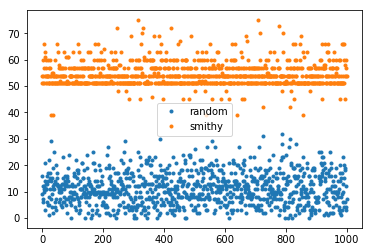

In [37]:
plt.plot(rl,'.')
plt.plot(smithy,'.')
plt.legend(['random','smithy'])

# games of smithy vs. chapel bot

In [14]:
st = time.time()
s = []
for i in xrange(1000):
    p1 = combobot.smithyComboBot
    p2 = combobot.chapelComboBot
    s_this = dominion.run([p1,p2])
    s.append(s_this)
print time.time() - st

16.1998410225


In [26]:
tmp = s[0][0][0]
tmp.name

'chapelComboBot'

In [27]:
chapel=[]
smithy=[]
for s_this in s:
    if s_this[0][0].name == 'chapelComboBot':
        chapel.append(s_this[0][1])
        smithy.append(s_this[1][1])
    else:
        chapel.append(s_this[1][1])
        smithy.append(s_this[0][1])

chapel = np.array(chapel)
smithy = np.array(smithy)

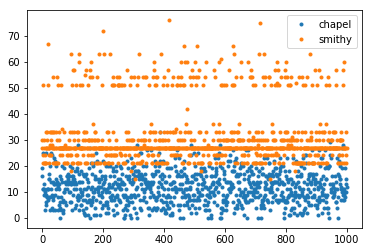

In [28]:
plt.plot(rl,'.')
plt.plot(smithy,'.')
plt.legend(['chapel','smithy'])

In [32]:
'winrate of chapel bot over smithy bot is {:.01f} %'.format(sum(chapel-smithy>0)/1000.*100)

'winrate of chapel bot over smithy bot is 26.4 %'

## random vs. chapel bot

In [42]:
st = time.time()
s = []
for i in xrange(100):
    p1 = combobot.chapelComboBot
    vf = lambda x: 0
    p2 = rl_agent.RLPlayer(vf)
    s_this = dominion.run([p1,p2])
    s.append(s_this)
print time.time() - st

10.6954860687


In [43]:
rl=[]
smithy=[]
for s_this in s:
    if isinstance(s_this[0][0], rl_agent.RLPlayer):
        rl.append(s_this[0][1])
        smithy.append(s_this[1][1])
    else:
        rl.append(s_this[1][1])
        smithy.append(s_this[0][1])

rl = np.array(rl)
smithy = np.array(smithy)

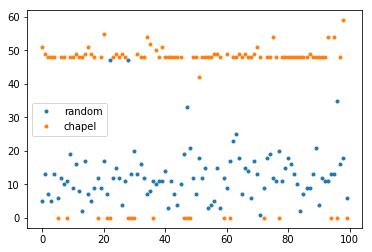

In [44]:
plt.plot(rl,'.')
plt.plot(smithy,'.')
plt.legend(['random','chapel'])

In [45]:
'winrate of random bot over chapel bot is {:.01f} %'.format(sum(rl-smithy>0)/1000.*100)

'winrate of random bot over chapel bot is 1.9 %'